<a href="https://colab.research.google.com/github/anupojuharshita/GEN_AI-project/blob/main/straight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import files
uploaded = files.upload()


Saving solidWhiteCurve.jpg to solidWhiteCurve.jpg


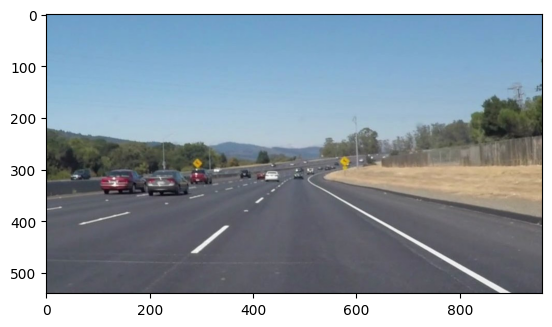

In [32]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/solidWhiteCurve.jpg")  # Change to your file name
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(image)
plt.axis("on")  # Hide axes
plt.show()


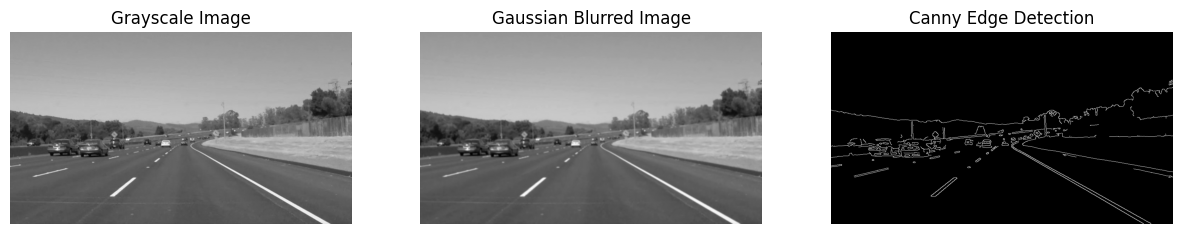

In [36]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/solidWhiteCurve.jpg"
image = cv2.imread(image_path)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5,5), 0)

edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)


fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Grayscale Image")
axes[0].axis("off")

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Gaussian Blurred Image")
axes[1].axis("off")

axes[2].imshow(edges, cmap='gray')
axes[2].set_title("Canny Edge Detection")
axes[2].axis("off")

plt.show()


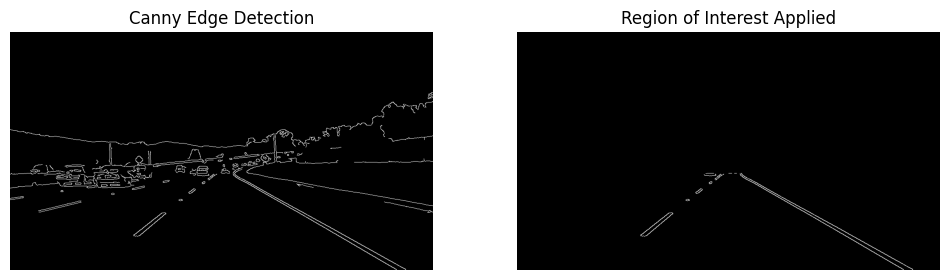

In [37]:

import numpy as np
def region_of_interest(img):
    height, width = img.shape[:2]

    roi_vertices = np.array([
        [(0, height), (width//2 - 50, height//2 + 50), (width//2 + 50, height//2 + 50), (width, height)]
    ], dtype=np.int32)


    mask = np.zeros_like(img)


    cv2.fillPoly(mask, roi_vertices, 255)


    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


roi_image = region_of_interest(edges)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(edges, cmap='gray')
axes[0].set_title("Canny Edge Detection")
axes[0].axis("off")

axes[1].imshow(roi_image, cmap='gray')
axes[1].set_title("Region of Interest Applied")
axes[1].axis("off")

plt.show()

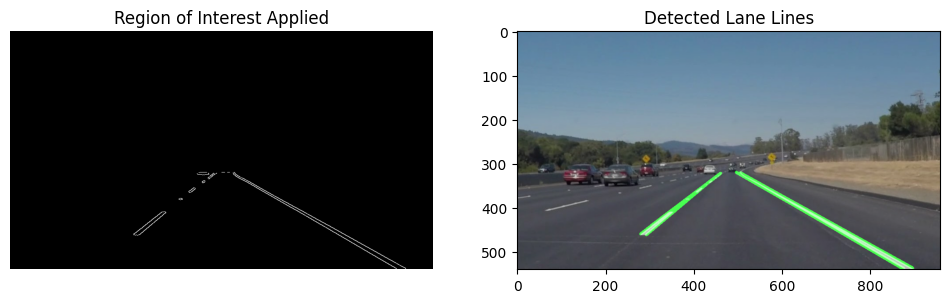

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_lines(img, lines):
    line_img = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
            if 0.5 < abs(slope) < 2:
                cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 5)
    return cv2.addWeighted(img, 0.8, line_img, 1, 0)

lines = cv2.HoughLinesP(roi_image, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=50)

lane_image = draw_lines(image, lines)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(roi_image, cmap='gray')
axes[0].set_title("Region of Interest Applied")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Detected Lane Lines")
axes[1].axis("on")

plt.show()


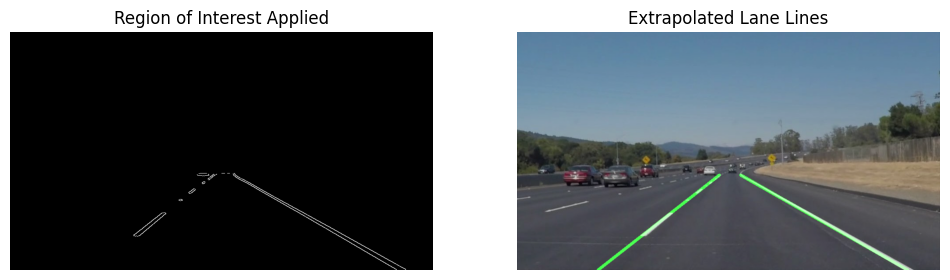

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extrapolate_lines(img, lines):
    left_lines = []
    right_lines = []
    height, width, _ = img.shape

    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
        if 0.5 < slope < 2:
            right_lines.append((x1, y1, x2, y2))
        elif -2 < slope < -0.5:
            left_lines.append((x1, y1, x2, y2))

    def make_line(points):
        x_coords, y_coords = [], []
        for x1, y1, x2, y2 in points:
            x_coords.extend([x1, x2])
            y_coords.extend([y1, y2])
        if len(x_coords) > 0:
            poly = np.polyfit(y_coords, x_coords, deg=1)
            y1, y2 = height, int(height * 0.6)
            x1, x2 = int(poly[0] * y1 + poly[1]), int(poly[0] * y2 + poly[1])
            return x1, y1, x2, y2
        return None

    left_lane = make_line(left_lines)
    right_lane = make_line(right_lines)

    lane_img = np.zeros_like(img)
    if left_lane:
        cv2.line(lane_img, (left_lane[0], left_lane[1]), (left_lane[2], left_lane[3]), (0, 255, 0), 5)
    if right_lane:
        cv2.line(lane_img, (right_lane[0], right_lane[1]), (right_lane[2], right_lane[3]), (0, 255, 0), 5)

    return cv2.addWeighted(img, 0.8, lane_img, 1, 0)


lines = cv2.HoughLinesP(roi_image, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=50)

lane_image = extrapolate_lines(image, lines)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(roi_image, cmap='gray')
axes[0].set_title("Region of Interest Applied")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Extrapolated Lane Lines")
axes[1].axis("off")

plt.show()

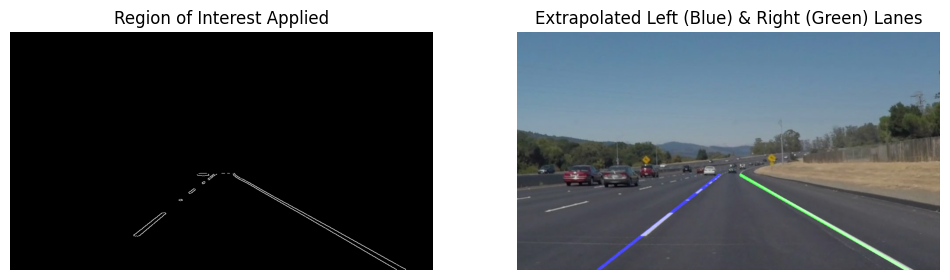

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extrapolate_lines(img, lines):
    left_lines = []
    right_lines = []
    height, width, _ = img.shape

    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2 - y1) / (x2 - x1) if (x2 - x1) != 0 else 0
        if 0.5 < slope < 2:
            right_lines.append((x1, y1, x2, y2))
        elif -2 < slope < -0.5:
            left_lines.append((x1, y1, x2, y2))

    def make_line(points):
        x_coords, y_coords = [], []
        for x1, y1, x2, y2 in points:
            x_coords.extend([x1, x2])
            y_coords.extend([y1, y2])
        if len(x_coords) > 0:
            poly = np.polyfit(y_coords, x_coords, deg=1)
            y1, y2 = height, int(height * 0.6)
            x1, x2 = int(poly[0] * y1 + poly[1]), int(poly[0] * y2 + poly[1])
            return x1, y1, x2, y2
        return None

    left_lane = make_line(left_lines)
    right_lane = make_line(right_lines)

    lane_img = np.zeros_like(img)

    if left_lane:
        cv2.line(lane_img, (left_lane[0], left_lane[1]), (left_lane[2], left_lane[3]), (255, 0, 0), 5) # Left lane in blue
    if right_lane:
        cv2.line(lane_img, (right_lane[0], right_lane[1]), (right_lane[2], right_lane[3]), (0, 255, 0), 5) # Right lane in green

    return cv2.addWeighted(img, 0.8, lane_img, 1, 0)

lines = cv2.HoughLinesP(roi_image, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=50)

lane_image = extrapolate_lines(image, lines)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(roi_image, cmap='gray')
axes[0].set_title("Region of Interest Applied")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Extrapolated Left (Blue) & Right (Green) Lanes")
axes[1].axis("off")

plt.show()